In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
import numpy as np

import pymc3 as pm

from modules.models.chapter_6 import estimate_latent_ability_membership, estimate_latent_ability_hier

from modules.utils import validate_model, visualize_samples

In [49]:
PRPC_KWARGS={
    'samples': 1000
}
SAMPLING_KWARGS={
    'draws': 1000,
    'tune': 20000,
}
POPC_KWARGS={
    'samples': 1000
}

# Estimate Latet Ability Group Membership

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [latent_group_2_ability, latent_group_1_ability]
>BinaryGibbsMetropolis: [latent_group_membership]


Sampling 4 chains for 3_000 tune and 1_000 draw iterations (12_000 + 4_000 draws total) took 60 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


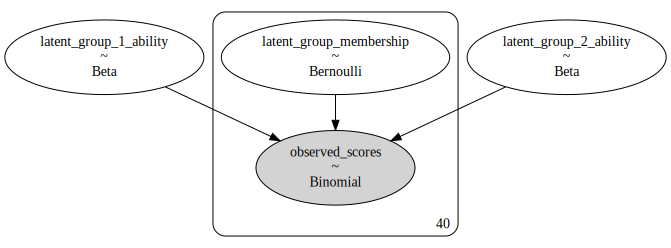

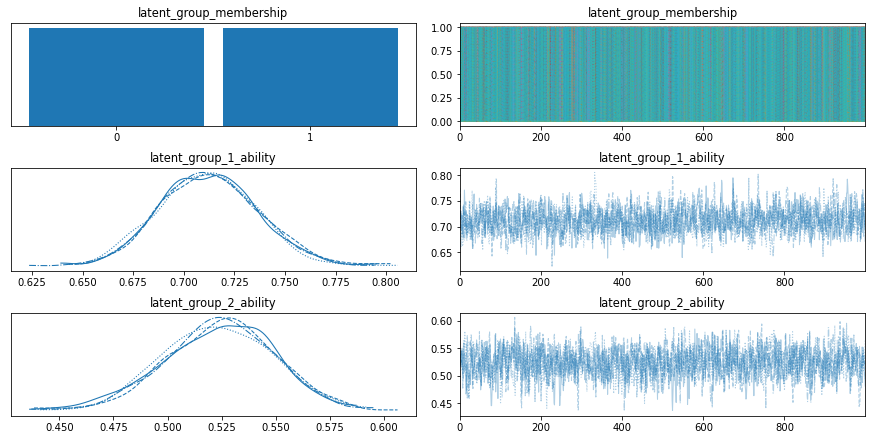

In [33]:
size_groups = 20
p_group_1 = 0.70
p_group_2 = 0.50
n_questions = 31

obs_scores = np.hstack(
    [
        np.random.binomial(n=n_questions, p=p_group_1, size=size_groups),
        np.random.binomial(n=n_questions, p=p_group_2, size=size_groups)
    ]
)

model = estimate_latent_ability_membership(
    obs_scores=obs_scores,
    number_questions=31,
    beta_1_kwargs={
        'alpha': 1,
        'beta': 1
    }, 
    beta_2_kwargs={
        'alpha': 1,
        'beta': 1
    },
    bernoulli_kwargs={
        'p': 0.5
    }
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

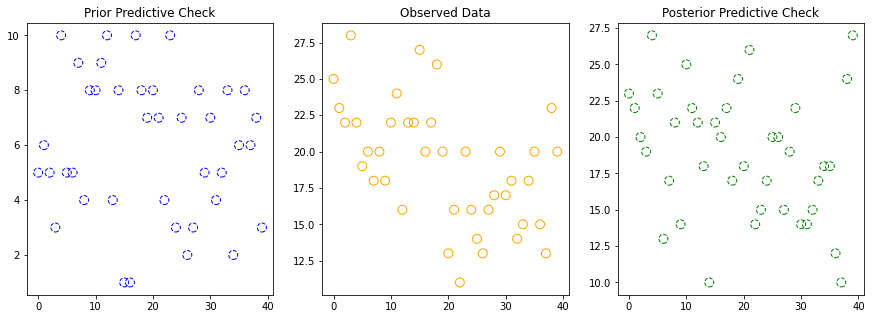

In [35]:
visualize_samples(
    observed=obs_scores, 
    prpc=prpc['observed_scores'][0, :], 
    popc=popc['observed_scores'][0, :],
    s=80
)

# Estimate Latet Ability (Hierarchically) and Group Membership

C:\Users\penthotal\Desktop\git_repositories\learning_bayes\books\bayesian_cognitive_modelling\modules\utils.py:33: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(**sampling_kwargs)
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [latent_group_2_ability, hyper_b_beta_2, hyper_a_beta_2, latent_group_1_ability, hyper_b_beta_1, hyper_a_beta_1]
>BinaryGibbsMetropolis: [latent_group_membership]


Sampling 4 chains for 20_000 tune and 1_000 draw iterations (80_000 + 4_000 draws total) took 958 seconds.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\arviz\stats\diagnostics.py:561: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
The acceptance probability does not match the target. It is 0.6565672389377256, but should be close to 0.8. Try to increase the number of tuning steps.
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.634623764058492, but should be close to 0.8. Try to increase the number of tuning steps.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.
C:\Users\penthotal\miniconda3\envs\bayes_env\lib\site-packages\pymc3\sampling.py:1689: UserWarn

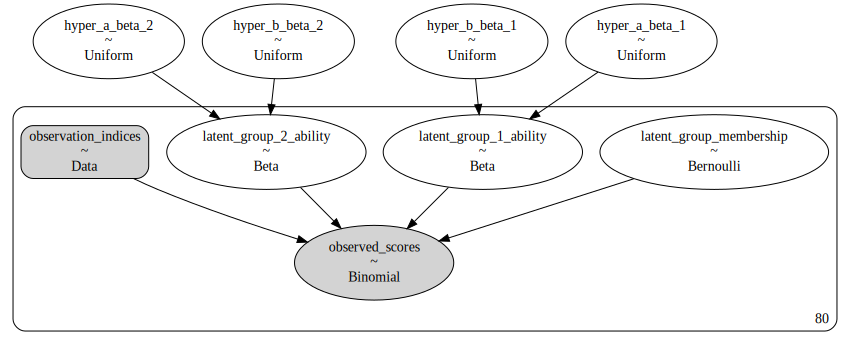

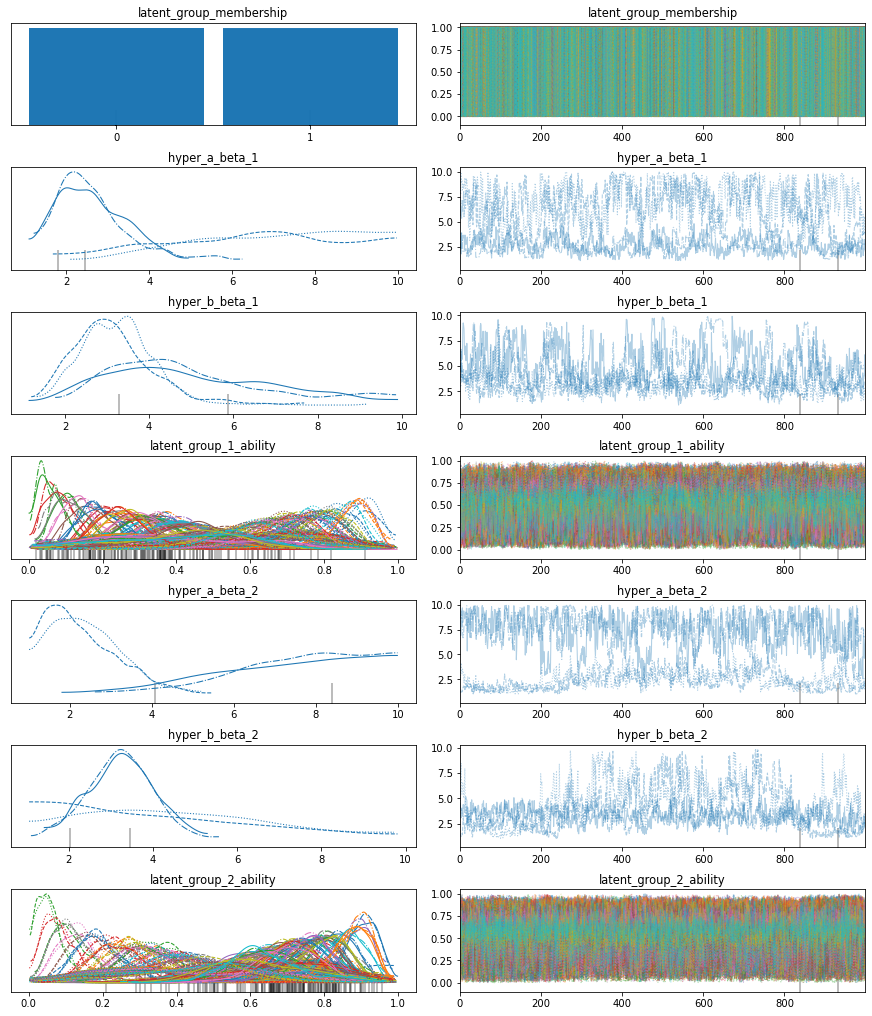

In [50]:
size_groups = 40
n_questions = 31

obs_scores = np.hstack(
    [
        np.random.binomial(n=n_questions, p=np.random.beta(a=3, b=7, size=size_groups)),
        np.random.binomial(n=n_questions, p=np.random.beta(a=7, b=3, size=size_groups))
    ]
)

model = estimate_latent_ability_hier(
    obs_scores=obs_scores,
    number_questions=31,
    a_beta_1_kwargs={
        'lower': 1,
        'upper': 10
    }, 
    b_beta_1_kwargs={
        'lower': 1,
        'upper': 10
    }, 
    a_beta_2_kwargs={
        'lower': 1,
        'upper': 10
    }, 
    b_beta_2_kwargs={
        'lower': 1,
        'upper': 10
    }, 
    bernoulli_kwargs={
        'p': 0.5
    }
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

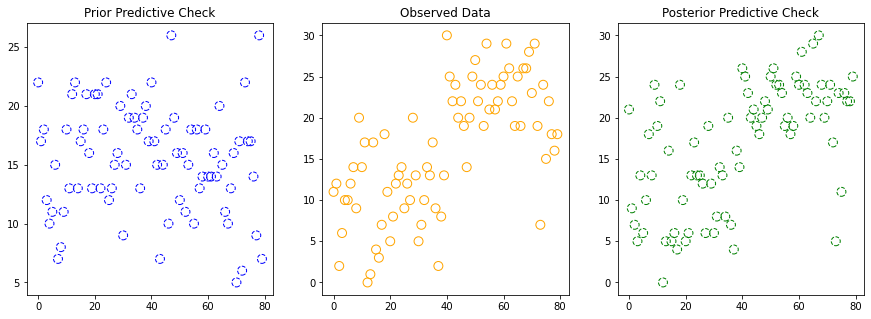

In [51]:
visualize_samples(
    observed=obs_scores, 
    prpc=prpc['observed_scores'][0, :], 
    popc=popc['observed_scores'][0, :],
    s=80
)